In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# uploading 2015-2022 database
from google.colab import files

uploaded = files.upload()
pitch_data_all = pd.read_csv('pitch_data_2015_2022 - pitch_data_2015_2022.csv')

In [ ]:
# 訓練データ
x_train = pitch_data_all.drop(['Name','Lev','Tm','Injury','Year'], axis=1)
y_train = pitch_data_all['Injury']


#相関係数を求める
corrs = []
features = x_train.columns

for c in features:
 corr = np.corrcoef(x_train[c], y_train)[0, 1]
 corrs.append(corr)
corrs = np.array(corrs)

idx = np.argsort(np.abs(corrs))[::-1]
#重要度上位56個を格納
cols = x_train.columns.values[idx][:56]
importances = corrs[idx][:56]

#print(cols, importances)
for i in range(len(cols)):
  print(cols[i] + '  -  ' + str(importances[i]))

SO  -  0.22001345499019132
W  -  0.20946279711134314
IP  -  0.2087523245254509
Pit  -  0.20656669906742525
AB  -  0.20489380758703804
SO/W  -  0.20484664860417326
BF  -  0.2041799507542245
BB  -  0.18572625322284356
H  -  0.18498081870571145
GS  -  0.17737972212084488
GDP  -  0.17543900323411044
R  -  0.16555005686030597
2B  -  0.1653744965413638
ER  -  0.1635743624818045
L  -  0.15928382827163878
HR  -  0.15507280214872468
G  -  0.14649644924686323
SB  -  0.14504591377783582
SO9  -  0.1437746068596288
StS  -  0.1387428445321146
CS  -  0.13738046208939375
3B  -  0.13529092756269104
HBP  -  0.12703515890579023
Arm  -  0.12385786638580093
WHIP  -  -0.12338712999167052
Shoulder  -  0.11311568578366923
Str  -  0.11191856411468526
SF  -  0.1086324751880278
ERA  -  -0.10836983511132826
PO  -  0.10323539630358065
Back  -  0.08625126897319584
StL  -  0.08396678243200362
Elbow  -  0.08358395749343367
IBB  -  0.08140702828154359
GB/FB  -  0.07002103326018974
Finger  -  0.062098439728693416
Obliq

<Axes: xlabel='importance', ylabel='feature'>

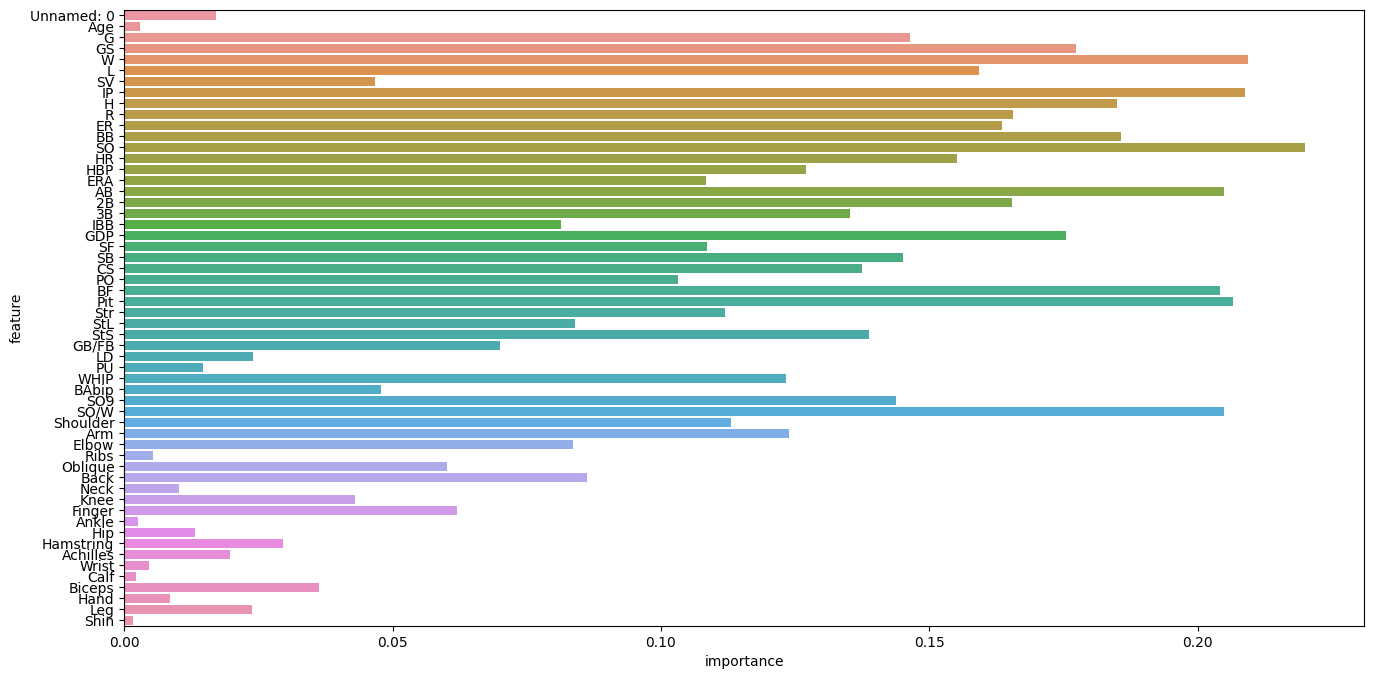

In [ ]:
#重要度可視化
feature_importances = pd.DataFrame()
feature_importances['feature'] = features
feature_importances['importance'] = abs(corrs)
plt.figure(figsize=(16, 8))
sns.barplot(data=feature_importances.head(56), x='importance', y='feature')

In [ ]:
#相関係数の絶対値が0.1より大きいものを選択

# 基準
c = 0.1
# 選択の実施
X_selected = []
for i in range(len(importances)):
  if importances[i] > c:
    X_selected.append(cols[i])
# 選択した特徴量（説明変数）
print(X_selected)

['SO', 'W', 'IP', 'Pit', 'AB', 'SO/W', 'BF', 'BB', 'H', 'GS', 'GDP', 'R', '2B', 'ER', 'L', 'HR', 'G', 'SB', 'SO9', 'StS', 'CS', '3B', 'HBP', 'Arm', 'Shoulder', 'Str', 'SF', 'PO']


In [ ]:
#選択した説明変数同士の相関
print(x_train[X_selected].corr())

                SO         W        IP       Pit        AB      SO/W  \
SO        1.000000  0.887522  0.954445  0.954911  0.946082  0.402080   
W         0.887522  1.000000  0.901549  0.891611  0.893452  0.329097   
IP        0.954445  0.901549  1.000000  0.996218  0.998590  0.320606   
Pit       0.954911  0.891611  0.996218  1.000000  0.996337  0.300142   
AB        0.946082  0.893452  0.998590  0.996337  1.000000  0.312887   
SO/W      0.402080  0.329097  0.320606  0.300142  0.312887  1.000000   
BF        0.945832  0.890597  0.998084  0.997869  0.999277  0.298224   
BB        0.864994  0.785441  0.902913  0.925413  0.901654  0.114891   
H         0.890876  0.846720  0.974152  0.976181  0.984046  0.265046   
GS        0.837410  0.808644  0.905243  0.905988  0.910379  0.185890   
GDP       0.747941  0.751627  0.855247  0.848023  0.856787  0.169992   
R         0.845274  0.780247  0.931544  0.943493  0.945375  0.204034   
2B        0.849479  0.799498  0.929695  0.933319  0.940341  0.24

In [ ]:
#選択した説明変数同士の相関の絶対値が0.8より大きければ一方のみを選択